In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import datetime

%matplotlib inline

In [2]:
train_df = pd.read_csv('~/Downloads/features.csv', index_col='match_id')
train_df.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [3]:
end_match_feat = ["duration", "tower_status_radiant", "tower_status_dire", "barracks_status_radiant", "barracks_status_dire",]
train_df.drop(end_match_feat, inplace=True, axis=1)

In [4]:
na = len(train_df) - train_df.count()
na[na!=0].sort_values()/len(train_df)

dire_courier_time              0.006953
radiant_courier_time           0.007117
dire_first_ward_time           0.018780
radiant_first_ward_time        0.018883
radiant_bottle_time            0.161380
dire_bottle_time               0.166029
first_blood_time               0.201100
first_blood_team               0.201100
first_blood_player1            0.201100
dire_flying_courier_time       0.268415
radiant_flying_courier_time    0.282619
first_blood_player2            0.452402
dtype: float64

In [5]:
train_df.fillna(0, inplace=True)

In [6]:
y_train = train_df['radiant_win']
x_train = train_df.drop(['radiant_win'], axis=1)

10	estimators
score:	0.6648506879750012
total time:	0:00:37.497938

20	estimators
score:	0.6824618768044435
total time:	0:00:58.038499

30	estimators
score:	0.6900064710388155
total time:	0:01:09.534555

50	estimators
score:	0.6974943609466162
total time:	0:01:49.832113

100	estimators
score:	0.7062229783991214
total time:	0:03:33.802157

250	estimators
score:	0.7159148634004586
total time:	0:09:02.913888



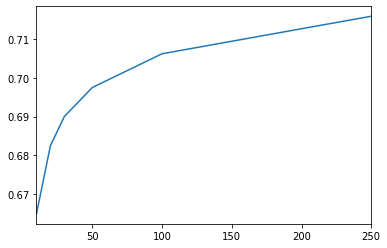

In [7]:
cross_V = KFold(n_splits=5, random_state=42, shuffle=True)

def gbc_Score(x, y) -> pd.Series:
  res = {}

  for n in [10, 20, 30, 50, 100, 250]:
    print(str(n) + "\testimators")
    clf = GradientBoostingClassifier(n_estimators=n, random_state=42)
    time_0 = datetime.datetime.now()
    score = cross_val_score(clf, x, y, cv=cross_V, n_jobs=-1, scoring='roc_auc').mean()
    print('score:\t' + str(score))
    print('total time:\t' + str(datetime.datetime.now() - time_0) + '\n')

    res[n] = score
  return pd.Series(res)

all_Scores = gbc_Score(x_train, y_train)
all_Scores.plot()

reg'n param:	1e-05
score:	0.6951616854636576
total_time:	0:00:04.332566

reg'n param:	0.0001
score:	0.7113577471434336
total_time:	0:00:04.522822

reg'n param:	0.001
score:	0.7163635378209221
total_time:	0:00:07.331357

reg'n param:	0.01
score:	0.716550269725914
total_time:	0:00:08.615095

reg'n param:	0.1
score:	0.7165271486657934
total_time:	0:00:10.390369

reg'n param:	1.0
score:	0.7165226003626437
total_time:	0:00:11.507659

reg'n param:	10.0
score:	0.7165222888959446
total_time:	0:00:10.327461

reg'n param:	100.0
score:	0.7165222952575674
total_time:	0:00:12.719363

reg'n param:	1000.0
score:	0.7165223227963708
total_time:	0:00:10.338642

reg'n param:	10000.0
score:	0.7165223270325809
total_time:	0:00:10.470182

reg'n param:	100000.0
score:	0.7165223312691259
total_time:	0:00:10.206303



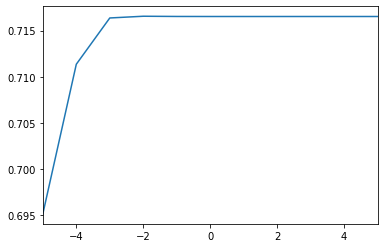

In [8]:
std_Scaler = StandardScaler()
x_train = pd.DataFrame(std_Scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)

def logreg_Score(x, y) -> pd.Series:
  res = {}
  for i in range(-5, 6):
    c = 10.0 ** i
    print('reg\'n param:\t' + str(c))
    model = LogisticRegression(C=c, random_state=42)
    time_0 = datetime.datetime.now()
    score = cross_val_score(model, x, y, cv=cross_V, n_jobs=-1, scoring='roc_auc').mean()
    print('score:\t' + str(score))
    print('total_time:\t' + str(datetime.datetime.now() - time_0) + '\n')
    res[i] = score
  return pd.Series(res)

all_Scores = logreg_Score(x_train, y_train)
all_Scores.plot()

In [15]:
def best_logreg_score(all_Scores):
  best = all_Scores.sort_values(ascending=False).head(1)
  best_param = 10.0 ** best.index[0]
  best_score = best.values[0]

  print('the best auc-roc score is', f"{best_score:.3f}", ' and it is achieved at c = ' + str(best_param))

best_logreg_score(all_Scores)

the best auc-roc score is 0.717  and it is achieved at c = 0.01


In [16]:
categ_cols = ['lobby_type',
              'r1_hero', 'd1_hero',
              'r2_hero', 'd2_hero',
              'r3_hero', 'd3_hero',
              'r4_hero', 'd4_hero',
              'r5_hero', 'd5_hero']
x_train.drop(categ_cols, axis=1, inplace=True)                      

reg'n param:	1e-05
score:	0.6951001913436112
total_time:	0:00:06.096334

reg'n param:	0.0001
score:	0.7113391458629873
total_time:	0:00:03.632046

reg'n param:	0.001
score:	0.7163757999081172
total_time:	0:00:06.684888

reg'n param:	0.01
score:	0.7165593885630225
total_time:	0:00:07.800592

reg'n param:	0.1
score:	0.7165342403465319
total_time:	0:00:08.628629

reg'n param:	1.0
score:	0.7165303634514961
total_time:	0:00:08.697914

reg'n param:	10.0
score:	0.7165299715025929
total_time:	0:00:09.424746

reg'n param:	100.0
score:	0.7165298910060073
total_time:	0:00:08.571457

reg'n param:	1000.0
score:	0.7165298888849942
total_time:	0:00:09.617197

reg'n param:	10000.0
score:	0.716529884649503
total_time:	0:00:08.800503

reg'n param:	100000.0
score:	0.716529884649503
total_time:	0:00:10.343838

the best auc-roc score is 0.717  and it is achieved at c = 0.01


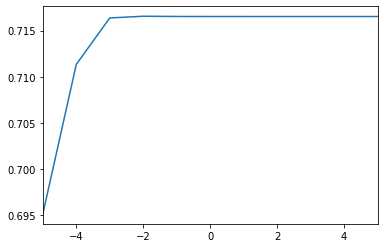

In [17]:
all_Scores = logreg_Score(x_train, y_train)
all_Scores.plot()
best_logreg_score(all_Scores)

In [20]:
all_heroes = np.unique(train_df[['r1_hero', 'd1_hero',
              'r2_hero', 'd2_hero',
              'r3_hero', 'd3_hero',
              'r4_hero', 'd4_hero',
              'r5_hero', 'd5_hero']].values.ravel())
n = max(all_heroes)
print('heroes in total', n)

heroes in total 112


In [22]:
def hero_select(df) -> pd.DataFrame:
  select = np.zeros((df.shape[0], n))

  for i, match_id in enumerate(df.index):
    for j in range(1, 5):
      select[i, df.loc[match_id, f"r{j}_hero"] - 1] = 1
      select[i, df.loc[match_id, f"d{j}_hero"] - 1] = -1
  return pd.DataFrame(select, index=df.index, columns=[f"hero{i}" for i in range(n)])

select = hero_select(train_df)
select.head()

,hero0,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,hero9,...,hero102,hero103,hero104,hero105,hero106,hero107,hero108,hero109,hero110,hero111
match_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


reg'n param:	1e-05
score:	0.6978120218139168
total_time:	0:00:09.169483

reg'n param:	0.0001
score:	0.7209050368211601
total_time:	0:00:06.121576

reg'n param:	0.001
score:	0.7389221609328025
total_time:	0:00:09.742460

reg'n param:	0.01
score:	0.743780857693916
total_time:	0:00:15.062404

reg'n param:	0.1
score:	0.743921881238448
total_time:	0:00:20.094609

reg'n param:	1.0
score:	0.7438944646340476
total_time:	0:00:22.354087

reg'n param:	10.0
score:	0.7438914513701095
total_time:	0:00:21.828794

reg'n param:	100.0
score:	0.7438911886291081
total_time:	0:00:22.035419

reg'n param:	1000.0
score:	0.743891218284897
total_time:	0:00:21.962414

reg'n param:	10000.0
score:	0.7438912818288796
total_time:	0:00:21.411170

reg'n param:	100000.0
score:	0.7438911928491182
total_time:	0:00:22.017601

the best auc-roc score is 0.744  and it is achieved at c = 0.1


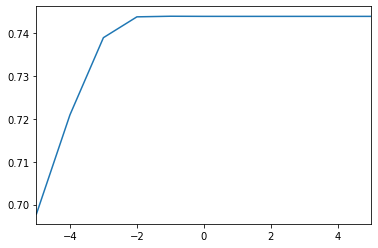

In [23]:
x_train = pd.concat([x_train, select], axis=1)
all_Scores = logreg_Score(x_train, y_train)
all_Scores.plot()
best_logreg_score(all_Scores)

In [24]:
logreg = LogisticRegression(C=0.1, random_state=42)
logreg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
test_df = pd.read_csv("~/Downloads/features_test.csv", index_col="match_id")
test_df.fillna(0, inplace=True)

In [26]:
x_test = pd.DataFrame(std_Scaler.fit_transform(test_df), columns=test_df.columns, index=test_df.index)
x_test.drop(categ_cols, axis=1, inplace=True)
x_test = pd.concat([x_test, hero_select(test_df)], axis=1)
x_test.head()

,start_time,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,...,hero102,hero103,hero104,hero105,hero106,hero107,hero108,hero109,hero110,hero111
match_id,,,,,,,,,,,,,,,,,,,,,
6,-2.514875,0.474746,-0.237743,-0.137094,-0.370005,-0.532732,1.003884,0.305165,-0.368985,0.003979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-2.513895,-1.365630,-1.207913,-1.255660,-1.145090,-0.532732,-0.593200,0.305165,0.567766,0.023887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,-2.512377,-1.365630,-0.862057,-0.742715,-1.145090,-0.532732,-0.593200,1.898546,-1.305736,-1.375081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,-2.508381,-0.445442,-0.938323,-0.537967,-1.145090,0.968865,1.003884,1.101855,-1.305736,-0.920823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
16,-2.507087,0.474746,0.038942,-1.059534,-0.812911,-0.532732,-0.593200,0.305165,1.504517,0.945070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
pred = pd.Series(logreg.predict_proba(x_test)[:, 1])
pred.describe()

count    17177.000000
mean         0.518419
std          0.214268
min          0.004820
25%          0.355411
50%          0.523340
75%          0.685633
max          0.996844
dtype: float64

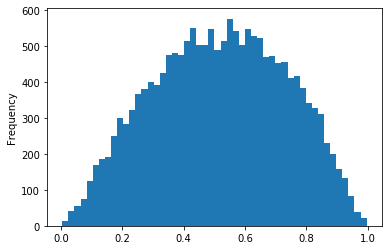

In [30]:
pred.plot.hist(bins=50)